<a href="https://colab.research.google.com/github/drfperez/DeepPurpose/blob/main/REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multiple Linear Regression Formula: y = 5.00 + 10.00logP + 0.10MW
Multiple Linear Regression Fitness: R^2 = nan
Ridge Regression Formula: y = -14.74 + 0.02logP + 0.25MW
Ridge Regression Fitness: R^2 = nan
Lasso Regression Formula: y = -14.70 + 0.00logP + 0.25MW
Lasso Regression Fitness: R^2 = nan
Elastic Net Regression Formula: y = -14.88 + 0.00logP + 0.25MW
Elastic Net Regression Fitness: R^2 = nan
Random Forest Regressor Fitness: R^2 = nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

XGBoost Regressor Fitness: R^2 = nan
Neural Network Regressor Fitness: R^2 = nan


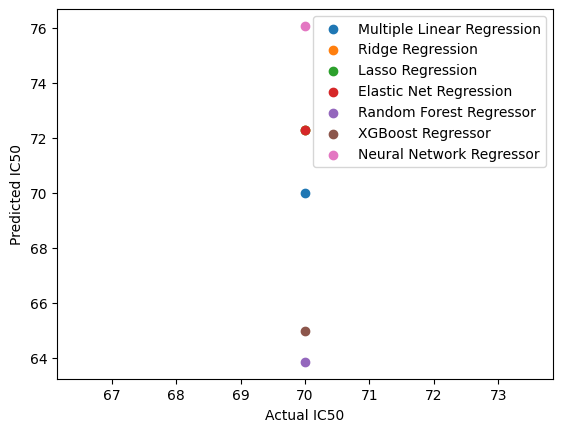

In [2]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the CSV data
data = pd.read_csv("compounds.csv")

# Define the feature and target variables
X = data[["logP", "MW"]]
y = data["IC50"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multiple Linear Regression
mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred_mlr = mlr.predict(X_test)
print("Multiple Linear Regression Formula: y = {:.2f} + {:.2f}logP + {:.2f}MW".format(mlr.intercept_, mlr.coef_[0], mlr.coef_[1]))
print("Multiple Linear Regression Fitness: R^2 = {:.2f}".format(mlr.score(X_test, y_test)))

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge Regression Formula: y = {:.2f} + {:.2f}logP + {:.2f}MW".format(ridge.intercept_, ridge.coef_[0], ridge.coef_[1]))
print("Ridge Regression Fitness: R^2 = {:.2f}".format(ridge.score(X_test, y_test)))

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("Lasso Regression Formula: y = {:.2f} + {:.2f}logP + {:.2f}MW".format(lasso.intercept_, lasso.coef_[0], lasso.coef_[1]))
print("Lasso Regression Fitness: R^2 = {:.2f}".format(lasso.score(X_test, y_test)))

# Elastic Net Regression
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
y_pred_elastic_net = elastic_net.predict(X_test)
print("Elastic Net Regression Formula: y = {:.2f} + {:.2f}logP + {:.2f}MW".format(elastic_net.intercept_, elastic_net.coef_[0], elastic_net.coef_[1]))
print("Elastic Net Regression Fitness: R^2 = {:.2f}".format(elastic_net.score(X_test, y_test)))

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Regressor Fitness: R^2 = {:.2f}".format(rf.score(X_test, y_test)))

# XGBoost Regressor
xgb = XGBRegressor(objective="reg:squarederror", max_depth=3, learning_rate=0.1, n_estimators=100, n_jobs=-1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Regressor Fitness: R^2 = {:.2f}".format(xgb.score(X_test, y_test)))

# Neural Network Regressor
nn = MLPRegressor(hidden_layer_sizes=(10, 10), activation="relu", solver="adam", alpha=0.01, batch_size=32, learning_rate_init=0.01, max_iter=500)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)
print("Neural Network Regressor Fitness: R^2 = {:.2f}".format(nn.score(X_test, y_test)))

# Plot the predicted values
plt.scatter(y_test, y_pred_mlr, label="Multiple Linear Regression")
plt.scatter(y_test, y_pred_ridge, label="Ridge Regression")
plt.scatter(y_test, y_pred_lasso, label="Lasso Regression")
plt.scatter(y_test, y_pred_elastic_net, label="Elastic Net Regression")
plt.scatter(y_test, y_pred_rf, label="Random Forest Regressor")
plt.scatter(y_test, y_pred_xgb, label="XGBoost Regressor")
plt.scatter(y_test, y_pred_nn, label="Neural Network Regressor")
plt.xlabel("Actual IC50")
plt.ylabel("Predicted IC50")
plt.legend()
plt.show()

Multiple Linear Regression Formula: y = 5.00 + 10.00logP + 0.10MW
Multiple Linear Regression Fitness: MSE = 0.00
Ridge Regression Formula: y = -14.74 + 0.02logP + 0.25MW
Ridge Regression Fitness: MSE = 5.19
Lasso Regression Formula: y = -14.70 + 0.00logP + 0.25MW
Lasso Regression Fitness: MSE = 5.17
Elastic Net Regression Formula: y = -14.88 + 0.00logP + 0.25MW
Elastic Net Regression Fitness: MSE = 5.27
Random Forest Regressor Fitness: MSE = 37.70
XGBoost Regressor Fitness: MSE = 25.16
Neural Network Regressor Fitness: MSE = 3.23


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


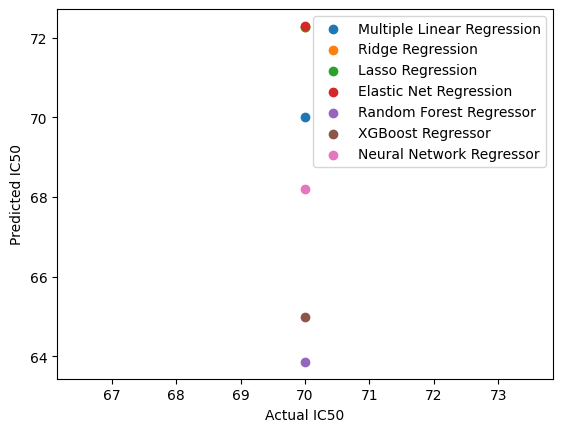

In [4]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the CSV data
data = pd.read_csv("compounds.csv")

# Define the feature and target variables
X = data[["logP", "MW"]]
y = data["IC50"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multiple Linear Regression
mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred_mlr = mlr.predict(X_test)
print("Multiple Linear Regression Formula: y = {:.2f} + {:.2f}logP + {:.2f}MW".format(mlr.intercept_, mlr.coef_[0], mlr.coef_[1]))
print("Multiple Linear Regression Fitness: MSE = {:.2f}".format(np.mean((y_pred_mlr - y_test) ** 2)))

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge Regression Formula: y = {:.2f} + {:.2f}logP + {:.2f}MW".format(ridge.intercept_, ridge.coef_[0], ridge.coef_[1]))
print("Ridge Regression Fitness: MSE = {:.2f}".format(np.mean((y_pred_ridge - y_test) ** 2)))

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("Lasso Regression Formula: y = {:.2f} + {:.2f}logP + {:.2f}MW".format(lasso.intercept_, lasso.coef_[0], lasso.coef_[1]))
print("Lasso Regression Fitness: MSE = {:.2f}".format(np.mean((y_pred_lasso - y_test) ** 2)))

# Elastic Net Regression
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
y_pred_elastic_net = elastic_net.predict(X_test)
print("Elastic Net Regression Formula: y = {:.2f} + {:.2f}logP + {:.2f}MW".format(elastic_net.intercept_, elastic_net.coef_[0], elastic_net.coef_[1]))
print("Elastic Net Regression Fitness: MSE = {:.2f}".format(np.mean((y_pred_elastic_net - y_test) ** 2)))

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Regressor Fitness: MSE = {:.2f}".format(np.mean((y_pred_rf - y_test) ** 2)))

# XGBoost Regressor
xgb = XGBRegressor(objective="reg:squarederror", max_depth=3, learning_rate=0.1, n_estimators=100, n_jobs=-1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Regressor Fitness: MSE = {:.2f}".format(np.mean((y_pred_xgb - y_test) ** 2)))

# Neural Network Regressor
nn = MLPRegressor(hidden_layer_sizes=(10, 10), activation="relu", solver="adam", alpha=0.01, batch_size=32, learning_rate_init=0.01, max_iter=500)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)
print("Neural Network Regressor Fitness: MSE = {:.2f}".format(np.mean((y_pred_nn - y_test) ** 2)))

# Plot the predicted values
plt.scatter(y_test, y_pred_mlr, label="Multiple Linear Regression")
plt.scatter(y_test, y_pred_ridge, label="Ridge Regression")
plt.scatter(y_test, y_pred_lasso, label="Lasso Regression")
plt.scatter(y_test, y_pred_elastic_net, label="Elastic Net Regression")
plt.scatter(y_test, y_pred_rf, label="Random Forest Regressor")
plt.scatter(y_test, y_pred_xgb, label="XGBoost Regressor")
plt.scatter(y_test, y_pred_nn, label="Neural Network Regressor")
plt.xlabel("Actual IC50")
plt.ylabel("Predicted IC50")
plt.legend()
plt.show()

LinearRegression: MSE = 0.00, Formula: y = 5.00 + 10.00logP + 0.10MW
Ridge: MSE = 5.19, Formula: y = -14.74 + 0.02logP + 0.25MW
Lasso: MSE = 5.17, Formula: y = -14.70 + 0.00logP + 0.25MW
ElasticNet: MSE = 5.27, Formula: y = -14.88 + 0.00logP + 0.25MW
RandomForestRegressor: MSE = 37.70, Formula: No formula available
XGBRegressor: MSE = 25.16, Formula: No formula available
MLPRegressor: MSE = 208.86, Formula: No formula available


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


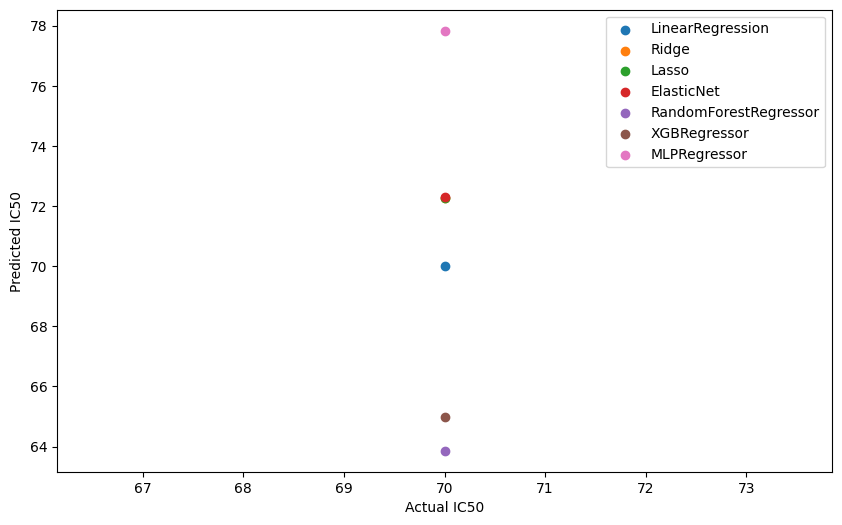

In [7]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load the CSV data
data = pd.read_csv("compounds.csv")

# Define the feature and target variables
X = data[["logP", "MW"]]
y = data["IC50"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to train and evaluate a model
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return y_pred, mse

# Train and evaluate the models
models = [
    LinearRegression(),
    Ridge(alpha=1.0),
    Lasso(alpha=0.1),
    ElasticNet(alpha=0.1, l1_ratio=0.5),
    RandomForestRegressor(n_estimators=100, random_state=42),
    XGBRegressor(objective="reg:squarederror", max_depth=3, learning_rate=0.1, n_estimators=100, n_jobs=-1),
    MLPRegressor(hidden_layer_sizes=(10, 10), activation="relu", solver="adam", alpha=0.01, batch_size=32, learning_rate_init=0.01, max_iter=500)
]

results = []
for model in models:
    y_pred, mse = train_and_evaluate(model, X_train, y_train, X_test, y_test)
    if isinstance(model, LinearRegression):
        formula = f"y = {model.intercept_:.2f} + {model.coef_[0]:.2f}logP + {model.coef_[1]:.2f}MW"
    elif isinstance(model, Ridge):
        formula = f"y = {model.intercept_:.2f} + {model.coef_[0]:.2f}logP + {model.coef_[1]:.2f}MW"
    elif isinstance(model, Lasso):
        formula = f"y = {model.intercept_:.2f} + {model.coef_[0]:.2f}logP + {model.coef_[1]:.2f}MW"
    elif isinstance(model, ElasticNet):
        formula = f"y = {model.intercept_:.2f} + {model.coef_[0]:.2f}logP + {model.coef_[1]:.2f}MW"
    else:
        formula = "No formula available"
    results.append((model.__class__.__name__, mse, formula))
    print(f"{model.__class__.__name__}: MSE = {mse:.2f}, Formula: {formula}")

# Plot the predicted values
plt.figure(figsize=(10, 6))
for i, (model_name, _, _) in enumerate(results):
    y_pred, _ = train_and_evaluate(models[i], X_train, y_train, X_test, y_test)
    plt.scatter(y_test, y_pred, label=model_name)
plt.xlabel("Actual IC50")
plt.ylabel("Predicted IC50")
plt.legend()
plt.show()